In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import plotly.graph_objects as go

In [2]:
data_file = '../Resources/COVID19_administrations.csv'
state_file = '../Resources/States Codes.csv'
output_file = '../Resources/Output_COVID_DATA.csv'
df = pd.read_csv(data_file)
df2 = pd.read_csv(state_file)
df_output = pd.read_csv(output_file)

C:\Users\dcurt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df2.head()

,Name,STATE
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
df.columns

Index(['State/Territory/Federal Entity', 'Total Doses Delivered',
       'Doses Delivered per 100K', '18+ Doses Delivered per 100K',
       'Total Doses Administered by State where Administered',
       'Doses Administered per 100k by State where Administered',
       '18+ Doses Administered by State where Administered',
       '18+ Doses Administered per 100K by State where Administered',
       'People with at least One Dose by State of Residence',
       'Percent of Total Pop with at least One Dose by State of Residence',
       'People 18+ with at least One Dose by State of Residence',
       'Percent of 18+ Pop with at least One Dose by State of Residence',
       'People Fully Vaccinated by State of Residence',
       'Percent of Total Pop Fully Vaccinated by State of Residence',
       'People 18+ Fully Vaccinated by State of Residence',
       'Percent of 18+ Pop Fully Vaccinated by State of Residence',
       'Total Number of Pfizer doses delivered',
       'Total Number of Mo

In [5]:
df.drop([
       '18+ Doses Delivered per 100K',
       'Doses Administered per 100k by State where Administered',
       '18+ Doses Administered by State where Administered',
       '18+ Doses Administered per 100K by State where Administered',
       'People with at least One Dose by State of Residence',
       'Percent of Total Pop with at least One Dose by State of Residence',
       'People 18+ with at least One Dose by State of Residence',
       'Percent of 18+ Pop with at least One Dose by State of Residence',
       'Total Number of Pfizer doses delivered',
       'Total Number of Moderna doses delivered',
       'Total Number of Janssen doses delivered',
       'Total Number of Janssen doses administered',
       'Total Number of Moderna doses administered',
       'Total Number of Pfizer doses adminstered',
       'Total Number of doses from unknown manufacturer delivered',
       'Total Number of doses from unknown manufacturer administered',
       'People Fully Vaccinated Unknown 2-dose manufacturer Resident',
       'People 18+ Fully Vaccinated Unknown 2-dose manufacturer Resident',
       'People with 2 Doses by State of Residence',
       'Percent of Total Pop with 1+ Doses by State of Residence',
       'People 18+ with 1+ Doses by State of Residence',
       'Percent of 18+ Pop with 1+ Doses by State of Residence',
       'Percent of Total Pop with 2 Doses by State of Residence',
       'People 18+ with 2 Doses by State of Residence',
       'Percent of 18+ Pop with 2 Doses by State of Residence',
       'People with 1+ Doses by State of Residence',
       'People 65+ with at least One Dose by State of Residence',
       'Percent of 65+ Pop with at least One Dose by State of Residence',
       'People 65+ Fully Vaccinated_Unknown 2-dose Manuf_Resident',
       '65+ Doses Administered by State where Administered',
       'Doses Administered per 100k of 65+ pop by State where Administered',
       'Doses Delivered per 100k of 65+ pop',
       'People 12+ with at least One Dose by State of Residence',
       'Percent of 12+ Pop with at least One Dose by State of Residence',
       'People 12+ Fully Vaccinated_Unknown 2-dose Manuf_Resident',
       '12+ Doses Administered by State where Administered',
       'Doses Administered per 100k of 12+ pop by State where Administered',
       'Doses Delivered per 100k of 12+ pop'],axis=1, inplace=True)

In [6]:
df.shape

(63, 24)

In [7]:
df.drop('Doses Delivered per 100K',axis=1,inplace=True)

In [8]:
df.shape

(63, 23)

In [9]:
# df.to_csv('../Resources/COVID_ADMIN_DATA.csv', index=False, header=True)

In [10]:
df.rename(columns = {'State/Territory/Federal Entity': 'Name'},inplace=True)
df3 = pd.merge(df,df2,how='inner',on='Name')

In [11]:
df3.to_csv('../Resources/COVID_ADMIN_DATA.csv', index=False, header=True)
df3.shape

(49, 24)

In [12]:
m_total_vac = df3['People Fully Vaccinated Moderna Resident'].sum()
p_total_vac = df3['People Fully Vaccinated Pfizer Resident'].sum()
j_total_vac = df3['People Fully Vaccinated Janssen Resident'].sum()

In [13]:
df_output.STATE.unique()

array(['TX', 'CA', 'WA', 'NV', 'KS', 'OH', 'TN', 'VA', 'NC', 'NY', 'GA',
       'NJ', 'LA', nan, 'IL', 'MD', 'ME', 'MA', 'MI', 'CT', 'FL', 'OK',
       'AR', 'ID', 'PA', 'IN', 'AZ', 'MN', 'NH', 'MO', 'CO', 'NE', 'UT',
       'DE', 'AL', 'MT', 'RI', 'MS', 'IA', 'AK', 'HI', 'WV', 'WI', 'NM',
       'OR', 'PR', 'KY', 'ND', 'SC', 'VT', 'DC', 'SD', 'WY', 'XB', 'VI',
       'Ca', 'GU', 'AS', 'MP', 'MH', 'FM', 'XV', 'Tx', 'QM'], dtype=object)

In [14]:
df_output['STATE'] = df_output['STATE'].str.upper()
df_output.STATE.unique()

array(['TX', 'CA', 'WA', 'NV', 'KS', 'OH', 'TN', 'VA', 'NC', 'NY', 'GA',
       'NJ', 'LA', nan, 'IL', 'MD', 'ME', 'MA', 'MI', 'CT', 'FL', 'OK',
       'AR', 'ID', 'PA', 'IN', 'AZ', 'MN', 'NH', 'MO', 'CO', 'NE', 'UT',
       'DE', 'AL', 'MT', 'RI', 'MS', 'IA', 'AK', 'HI', 'WV', 'WI', 'NM',
       'OR', 'PR', 'KY', 'ND', 'SC', 'VT', 'DC', 'SD', 'WY', 'XB', 'VI',
       'GU', 'AS', 'MP', 'MH', 'FM', 'XV', 'QM'], dtype=object)

In [15]:
df_merge = pd.merge(df_output,df3, on='STATE',how='inner')


In [16]:
df_merge.to_csv('../Resources/Cleaned_Merged_Output.csv')

In [17]:
df_merge.shape

(214315, 35)

In [18]:
df_merge.STATE.unique()

array(['TX', 'CA', 'WA', 'NV', 'KS', 'OH', 'TN', 'VA', 'NC', 'GA', 'NJ',
       'LA', 'IL', 'MD', 'ME', 'MA', 'MI', 'CT', 'FL', 'OK', 'AR', 'ID',
       'PA', 'IN', 'AZ', 'MN', 'NH', 'MO', 'CO', 'NE', 'UT', 'DE', 'AL',
       'MT', 'RI', 'MS', 'IA', 'AK', 'HI', 'WV', 'WI', 'NM', 'OR', 'KY',
       'ND', 'SC', 'VT', 'SD', 'WY'], dtype=object)

In [19]:
df_merge['DIED'] = df_merge['DIED'].replace(np.nan,'N')

In [20]:
df_merge['DIED'].head()

0    N
1    N
2    N
3    N
4    N
Name: DIED, dtype: object

In [21]:
df_merge['DIED'].unique()

array(['N', 'Y'], dtype=object)

In [22]:
df_merge.groupby(['VAX_NAME','SEX','DIED']).describe()

VAERS_ID                \
                                                count          mean   
VAX_NAME                            SEX DIED                          
COVID19 (COVID19 (JANSSEN))         F   N     18822.0  1.201053e+06   
                                        Y       125.0  1.223048e+06   
                                    M   N      9026.0  1.210359e+06   
                                        Y       144.0  1.221445e+06   
                                    U   N       776.0  1.232973e+06   
                                        Y         9.0  1.252164e+06   
COVID19 (COVID19 (MODERNA))         F   N     78703.0  1.049802e+06   
                                        Y       717.0  1.131367e+06   
                                    M   N     22399.0  1.073293e+06   
                                        Y       884.0  1.119813e+06   
                                    U   N      2448.0  9.904073e+05   
                                        Y        13.0  1.177837e+06   
COVID19 (COVID19 (PFIZER-BIONTECH)) F   N     58066.0  1.062026e+06   
                                        Y       644.0  1.121502e+06   
                                    M   N     19981.0  1.092863e+06   
                                        Y       676.0  1.126505e+06   
                                    U   N       848.0  1.073530e+06   
                                        Y        34.0  1.117797e+06   

                                                                        \
                                                        std        min   
VAX_NAME                            SEX DIED                             
COVID19 (COVID19 (JANSSEN))         F   N      62782.191144  1070055.0   
                                        Y      56462.845020  1102815.0   
                                    M   N      65291.712639  1070546.0   
                                        Y      56885.766601  1093939.0   
                                    U   N      44195.491997  1079511.0   
                                        Y      57306.534051  1157515.0   
COVID19 (COVID19 (MODERNA))         F   N      86506.624859   916600.0   
                                        Y     108760.812173   917790.0   
                                    M   N      93489.670580   916607.0   
                                        Y     109591.240981   917117.0   
                                    U   N      58759.533722   917000.0   
                                        Y      84996.902564  1034985.0   
COVID19 (COVID19 (PFIZER-BIONTECH)) F   N     102979.767030   916602.0   
                                        Y     115519.792431   918388.0   
                                    M   N     109108.410024   916638.0   
                                        Y     116998.035568   918418.0   
                                    U   N     123007.204253   917480.0   
                                        Y     126013.404686   955879.0   

                                                                     \
                                                     25%        50%   
VAX_NAME                            SEX DIED                          
COVID19 (COVID19 (JANSSEN))         F   N     1164765.50  1203012.0   
                                        Y     1188040.00  1223378.0   
                                    M   N     1174001.00  1205819.0   
                                        Y     1200988.50  1215401.0   
                                    U   N     1206571.75  1236282.5   
                                        Y     1227927.00  1276508.0   
COVID19 (COVID19 (MODERNA))         F   N      979523.50  1041119.0   
                                        Y     1047183.00  1123247.0   
                                    M   N      998746.00  1071667.0   
                                        Y     1033084.50  1106759.0   
                                    U   N      963865.75   975137.5   
    

In [23]:
death = pd.DataFrame(df_merge.groupby(['VAX_NAME','SEX','DIED'])['DIED'].count())

In [24]:
j_f_death = death['DIED'][1]
j_m_death = death['DIED'][3]

m_f_death = death['DIED'][7]
m_m_death = death['DIED'][9]

p_f_death = death['DIED'][13]
p_m_death = death['DIED'][15]

In [25]:
death.to_csv('../Resources/Images/DeathsbyVaxandSex.csv')
death

DIED
VAX_NAME                            SEX DIED       
COVID19 (COVID19 (JANSSEN))         F   N     18822
                                        Y       125
                                    M   N      9026
                                        Y       144
                                    U   N       776
                                        Y         9
COVID19 (COVID19 (MODERNA))         F   N     78703
                                        Y       717
                                    M   N     22399
                                        Y       884
                                    U   N      2448
                                        Y        13
COVID19 (COVID19 (PFIZER-BIONTECH)) F   N     58066
                                        Y       644
                                    M   N     19981
                                        Y       676
                                    U   N       848
                                        Y        34

In [26]:
j_m_mortality_rate = j_m_death / j_total_vac
print(j_m_mortality_rate)
j_f_mortality_rate = j_f_death / j_total_vac
print(j_f_mortality_rate)

m_m_mortality_rate = m_m_death / m_total_vac
print(m_m_mortality_rate)
m_f_mortality_rate = m_f_death / m_total_vac
print(m_f_mortality_rate)

p_m_mortality_rate = p_m_death / p_total_vac
print(p_m_mortality_rate)
p_f_mortality_rate = p_f_death / p_total_vac
print(p_f_mortality_rate)

1.4627128590033176e-05
1.2697160234403798e-05
1.728585383797676e-05
1.4020313576730018e-05
1.0483365333961094e-05
9.987111353655244e-06


In [27]:
mortality_df = pd.DataFrame({
    'Vaccine Type': ['Janssen', 'Moderna', 'Pfizer'],
    'Male': [j_m_mortality_rate, m_m_mortality_rate, p_m_mortality_rate],
    'Female': [j_f_mortality_rate, m_f_mortality_rate ,p_f_mortality_rate]
})

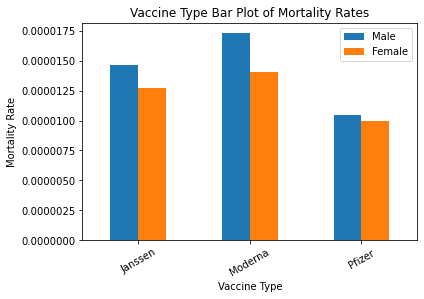

In [28]:
barplot2_data = mortality_df.groupby(['Vaccine Type']).sum()
barplot2 = barplot2_data.plot.bar(title='Vaccine Type Bar Plot of Mortality Rates')
barplot2.set_xlabel('Vaccine Type')
barplot2.set_ylabel('Mortality Rate')
barplot2.ticklabel_format(axis='y',style='plain')
plt.xticks(rotation=30)
fig = barplot2.get_figure()
plt.savefig('../Resources/Images/VaccineMortalityBarplot.png')

In [29]:
mortality_df.groupby(['Vaccine Type']).sum().to_csv('../Resources/Images/VaccineTypebySexDeath.csv')


In [30]:
m_deaths = (j_m_death + m_m_death + p_m_death) 
f_deaths = (j_f_death + m_f_death + p_f_death)

In [31]:
gender_deaths_df = pd.DataFrame({
    'M': [m_deaths],
    'F': [f_deaths]
})
gender_deaths_df

,M,F
0,1704,1486


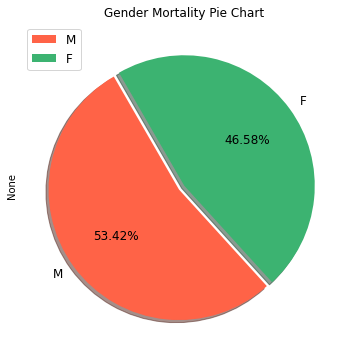

In [32]:
explode = (0.05, 0)
y=gender_deaths_df.sum()
y.plot(kind='pie', autopct= '%1.2f%%', figsize=(6,6), explode = explode, startangle = 120, fontsize = 12,
       shadow=True, colors=["tomato",'mediumseagreen'])
plt.legend(y.index, fontsize=12)
plt.title("Gender Mortality Pie Chart")
plt.savefig('../Resources/Images/MortalitybySex.png')
plt.show()

In [33]:
df_merge

,VAERS_ID,VAX_MANU,VAX_NAME,STATE,AGE_YRS,SEX,DIED,DATEDIED,ER_VISIT,HOSPITAL,...,People 65+ Fully Vaccinated by State of Residence,Percent of 65+ Pop Fully Vaccinated by State of Residence,People 65+ Fully Vaccinated_Moderna_Resident,People 65+ Fully Vaccinated_Pfizer_Resident,People 65+ Fully Vaccinated_Janssen_Resident,People 12+ Fully Vaccinated by State of Residence,Percent of 12+ Pop Fully Vaccinated by State of Residence,People 12+ Fully Vaccinated_Moderna_Resident,People 12+ Fully Vaccinated_Pfizer_Resident,People 12+ Fully Vaccinated_Janssen_Resident
0,916600,MODERNA,COVID19 (COVID19 (MODERNA)),TX,33.0,F,N,NaN,NaN,NaN,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
1,916604,MODERNA,COVID19 (COVID19 (MODERNA)),TX,47.0,F,N,NaN,NaN,NaN,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
2,916702,MODERNA,COVID19 (COVID19 (MODERNA)),TX,70.0,F,N,NaN,NaN,NaN,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
3,916703,MODERNA,COVID19 (COVID19 (MODERNA)),TX,60.0,F,N,NaN,NaN,NaN,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
4,916704,MODERNA,COVID19 (COVID19 (MODERNA)),TX,35.0,F,N,NaN,NaN,NaN,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214310,1307523,JANSSEN,COVID19 (COVID19 (JANSSEN)),WY,57.0,F,N,NaN,NaN,NaN,...,69539,70.1,36134,31068,2315,185985,37.9,86174,85884,13876
214311,1310081,JANSSEN,COVID19 (COVID19 (JANSSEN)),WY,37.0,F,N,NaN,NaN,NaN,...,69539,70.1,36134,31068,2315,185985,37.9,86174,85884,13876
214312,1317972,JANSSEN,COVID19 (COVID19 (JANSSEN)),WY,63.0,M,N,NaN,NaN,NaN,...,69539,70.1,36134,31068,2315,185985,37.9,86174,85884,13876
214313,1320334,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),WY,51.0,F,N,NaN,NaN,NaN,...,69539,70.1,36134,31068,2315,185985,37.9,86174,85884,13876


In [34]:
df_merge2 = df_merge.loc[df_merge['DIED'] == 'Y']

In [35]:
df_merge['DIED'].unique()

array(['N', 'Y'], dtype=object)

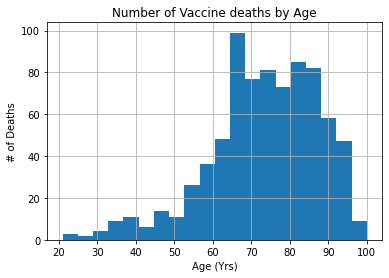

In [36]:
plt.hist(df_merge2.sample(frac=0.251,replace = True)['AGE_YRS'], bins = 20)
plt.grid()
plt.ylabel('# of Deaths')
plt.xlabel('Age (Yrs)')
plt.title('Number of Vaccine deaths by Age')
plt.savefig('../Resources/Images/NumberVaccineDeathsbyAge.png')

In [37]:
bins = [12,18,65,101]
labels = ['12+','18+','65+']
pd.cut(df_merge2['AGE_YRS'], bins=bins, labels=labels)
df_merge.columns

Index(['VAERS_ID', 'VAX_MANU', 'VAX_NAME', 'STATE', 'AGE_YRS', 'SEX', 'DIED',
       'DATEDIED', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'DISABLE', 'Name',
       'Total Doses Delivered',
       'Total Doses Administered by State where Administered',
       'People Fully Vaccinated by State of Residence',
       'Percent of Total Pop Fully Vaccinated by State of Residence',
       'People 18+ Fully Vaccinated by State of Residence',
       'Percent of 18+ Pop Fully Vaccinated by State of Residence',
       'People Fully Vaccinated Moderna Resident',
       'People Fully Vaccinated Pfizer Resident',
       'People Fully Vaccinated Janssen Resident',
       'People 18+ Fully Vaccinated Moderna Resident',
       'People 18+ Fully Vaccinated Pfizer Resident',
       'People 18+ Fully Vaccinated Janssen Resident',
       'People 65+ Fully Vaccinated by State of Residence',
       'Percent of 65+ Pop Fully Vaccinated by State of Residence',
       'People 65+ Fully Vaccinated_Moderna_Resident',


No handles with labels found to put in legend.


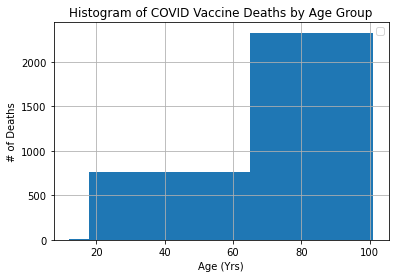

In [38]:
plt.hist(df_merge2['AGE_YRS'], bins = bins)
plt.title("Histogram of COVID Vaccine Deaths by Age Group")
plt.xlabel("Age (Yrs)")
plt.ylabel("# of Deaths")
plt.legend()
plt.grid()
plt.savefig('../Resources/Images/HistbyAgeGroup.png')
plt.show()

In [39]:
# 64+ All Vaccines
moderna_64up_total_vax = df_merge['People 65+ Fully Vaccinated_Moderna_Resident'].sum()
pfizer_64up_total_vax = df_merge['People 65+ Fully Vaccinated_Pfizer_Resident'].sum()
jj_64up_total_vax = df_merge['People 65+ Fully Vaccinated_Janssen_Resident'].sum()


df_merge3 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (MODERNA))') & (df_merge['AGE_YRS'] > 64)]
df_merge4 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (PFIZER-BIONTECH))') & (df_merge['AGE_YRS'] > 64)]
df_merge5 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (JANSSEN))') & (df_merge['AGE_YRS'] > 64)]

# 12+ All Vaccines
moderna_12up_total_vax = df_merge['People 12+ Fully Vaccinated_Moderna_Resident'].sum()
pfizer_12up_total_vax = df_merge['People 12+ Fully Vaccinated_Pfizer_Resident'].sum()
jj_12up_total_vax = df_merge['People 12+ Fully Vaccinated_Janssen_Resident'].sum()


df_merge6 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (MODERNA))') & (df_merge['AGE_YRS'] >= 12) & (df_merge['AGE_YRS'] < 18)]
df_merge7 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (PFIZER-BIONTECH))') & (df_merge['AGE_YRS'] >= 12) & (df_merge['AGE_YRS'] < 18)]
df_merge8 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (JANSSEN))') & (df_merge['AGE_YRS'] >= 12) & (df_merge['AGE_YRS'] < 18)]

# 18+ All Vaccines
moderna_18up_total_vax = df_merge['People 18+ Fully Vaccinated Moderna Resident'].sum()
pfizer_18up_total_vax = df_merge['People 18+ Fully Vaccinated Pfizer Resident'].sum()
jj_18up_total_vax = df_merge['People 18+ Fully Vaccinated Janssen Resident'].sum()


df_merge9 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (MODERNA))') & (df_merge['AGE_YRS'] >= 18) & (df_merge['AGE_YRS'] < 65)]
df_merge10 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (PFIZER-BIONTECH))') & (df_merge['AGE_YRS'] >= 18) & (df_merge['AGE_YRS'] < 65)]
df_merge11 = df_merge.loc[(df_merge['VAX_NAME'] == 'COVID19 (COVID19 (JANSSEN))') & (df_merge['AGE_YRS'] >= 18) & (df_merge['AGE_YRS'] < 65)]



In [40]:
# 64+ All Vaccines
moderna_64up_deaths = df_merge3['DIED'].loc[df_merge3['DIED'] == 'Y'].count()
pfizer_64up_deaths = df_merge4['DIED'].loc[df_merge4['DIED'] == 'Y'].count()
jj_64up_deaths = df_merge5['DIED'].loc[df_merge5['DIED'] == 'Y'].count()

# 12+ All Vaccines
moderna_12up_deaths = df_merge6['DIED'].loc[df_merge6['DIED'] == 'Y'].count()
pfizer_12up_deaths = df_merge7['DIED'].loc[df_merge7['DIED'] == 'Y'].count()
jj_12up_deaths = df_merge8['DIED'].loc[df_merge8['DIED'] == 'Y'].count()


# 18+ All Vaccines
moderna_18up_deaths = df_merge9['DIED'].loc[df_merge9['DIED'] == 'Y'].count()
pfizer_18up_deaths = df_merge10['DIED'].loc[df_merge10['DIED'] == 'Y'].count()
jj_18up_deaths = df_merge11['DIED'].loc[df_merge11['DIED'] == 'Y'].count()

In [41]:
# 64+ All Vaccines
moderna_64up_rate = moderna_64up_deaths/moderna_64up_total_vax
pfizer_64up_rate = pfizer_64up_deaths/pfizer_64up_total_vax
jj_64up_rate = jj_64up_deaths/jj_64up_total_vax

# 12+ All Vaccines
moderna_12up_rate = moderna_12up_deaths/moderna_12up_total_vax
pfizer_12up_rate = pfizer_12up_deaths/pfizer_12up_total_vax
jj_12up_rate = jj_12up_deaths/jj_12up_total_vax

# 18+ All Vaccines
moderna_18up_rate = moderna_18up_deaths/moderna_18up_total_vax
pfizer_18up_rate = pfizer_18up_deaths/pfizer_18up_total_vax
jj_18up_rate = jj_18up_deaths/jj_18up_total_vax

In [42]:
# 64+ All Vaccines
a64up_mortality_rate = [moderna_64up_rate, pfizer_64up_rate, jj_64up_rate]
a12up_mortality_rate = [moderna_12up_rate, pfizer_12up_rate, jj_12up_rate]
a18up_mortality_rate = [moderna_18up_rate, pfizer_18up_rate, jj_18up_rate]

age_df = pd.DataFrame({
    '64+': a64up_mortality_rate,
    '12+': a12up_mortality_rate,
    '18+': a18up_mortality_rate
})

age_df

,64+,12+,18+
0,7.246507e-09,2.069523e-12,7.719618e-10
1,6.214262e-09,8.171364e-12,4.785953e-10
2,9.210265e-09,0.000000e+00,1.085627e-09


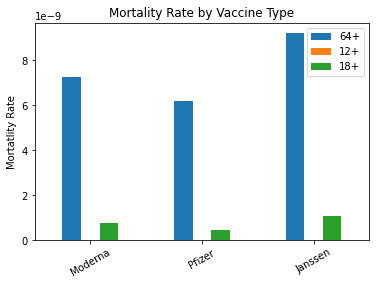

In [43]:
age_df.rename(index={0: 'Moderna', 1: 'Pfizer', 2: 'Janssen'},inplace=True)

age_df.plot.bar()
plt.ylabel('Mortatlity Rate')
plt.title('Mortality Rate by Vaccine Type')
plt.xticks(rotation=30)
plt.savefig('../Resources/Images/MortalitybyVaccineandAgeGroup.png')
plt.show()

In [202]:
states = pd.DataFrame(df_output.groupby('STATE')['DIED'].count())
states2 = pd.merge(states, df2, on='STATE', how='inner')
states2.drop(states2.STATE.loc[states2.STATE == 'NY'].index[0], axis = 0,inplace=True)

vax_by_state = df_merge.groupby('STATE')['People Fully Vaccinated by State of Residence'].unique()
vax_by_state_df = vax_by_state.reset_index()

vax_mortality_df = pd.merge(states2,vax_by_state_df, on='STATE',how='inner')
vax_mortality_df

state_mortality = []
for x in range(49):
    state_mortality.append(vax_mortality_df['DIED'][x] / vax_mortality_df['People Fully Vaccinated by State of Residence'][x][0])

vax_mortality_df['mortality_rate_by_state'] = state_mortality
vax_mortality_df


,STATE,DIED,Name,People Fully Vaccinated by State of Residence,mortality_rate_by_state
0,AK,26,Alaska,[290096],0.000090
1,AL,51,Alabama,[1440101],0.000035
2,AR,41,Arkansas,[950289],0.000043
3,AZ,55,Arizona,[2648659],0.000021
4,CA,304,California,[17297403],0.000018
5,CO,56,Colorado,[2651999],0.000021
6,CT,31,Connecticut,[1930105],0.000016
7,DE,9,Delaware,[427746],0.000021
8,FL,192,Florida,[8510451],0.000023
9,GA,93,Georgia,[3512913],0.000026


In [204]:
fig = go.Figure(data=go.Choropleth(
    locations=states2['STATE'].astype(str), # Spatial coordinates
    z = vax_mortality_df['mortality_rate_by_state'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Mortality Rate",
))

fig.update_layout(
    title_text = 'COVID-19 Mortality Rate by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [46]:
from scipy import stats
df_merge_code = df_merge2.copy(deep=True)
df_merge_code['DIED'] = df_merge_code.DIED.map({'Y':1, 'N':0})
stats.ttest_ind(df_merge_code['DIED'], df_merge_code.loc[df_merge_code['AGE_YRS'] < 65]['AGE_YRS'], equal_var = False)

# df_merge2.loc[df_merge2['AGE_YRS'] < 65]['AGE_YRS']
# df_merge_code['DIED'].values


Ttest_indResult(statistic=-134.88774334088092, pvalue=0.0)

In [47]:
df_merge_code.head()

,VAERS_ID,VAX_MANU,VAX_NAME,STATE,AGE_YRS,SEX,DIED,DATEDIED,ER_VISIT,HOSPITAL,...,People 65+ Fully Vaccinated by State of Residence,Percent of 65+ Pop Fully Vaccinated by State of Residence,People 65+ Fully Vaccinated_Moderna_Resident,People 65+ Fully Vaccinated_Pfizer_Resident,People 65+ Fully Vaccinated_Janssen_Resident,People 12+ Fully Vaccinated by State of Residence,Percent of 12+ Pop Fully Vaccinated by State of Residence,People 12+ Fully Vaccinated_Moderna_Resident,People 12+ Fully Vaccinated_Pfizer_Resident,People 12+ Fully Vaccinated_Janssen_Resident
852,930876,MODERNA,COVID19 (COVID19 (MODERNA)),TX,88.0,M,1,01/08/2021,NaN,NaN,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
1099,935350,MODERNA,COVID19 (COVID19 (MODERNA)),TX,81.0,M,1,01/06/2021,NaN,Y,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
1380,940602,MODERNA,COVID19 (COVID19 (MODERNA)),TX,83.0,M,1,NaN,NaN,NaN,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
2464,963235,MODERNA,COVID19 (COVID19 (MODERNA)),TX,94.0,F,1,01/18/2021,NaN,Y,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528
2468,963269,MODERNA,COVID19 (COVID19 (MODERNA)),TX,87.0,F,1,01/18/2021,NaN,NaN,...,2641680,70.7,1088510,1334324,218676,10455865,43.4,4308362,5281305,865528


In [48]:
df_merge2['DIED'].shape

(3246,)

In [49]:
df_died = df_merge.loc[df_merge['DIED'] == 'Y']
df_lived = df_merge.loc[df_merge['DIED'] == 'N']
df_died.shape
# df_lived['AGE_YRS']
# df_died['AGE_YRS'].dtype

(3246, 35)

In [50]:
stats.ttest_ind(df_died['AGE_YRS'].dropna(), df_lived['AGE_YRS'].dropna(), equal_var = False)


Ttest_indResult(statistic=82.74394468906031, pvalue=0.0)

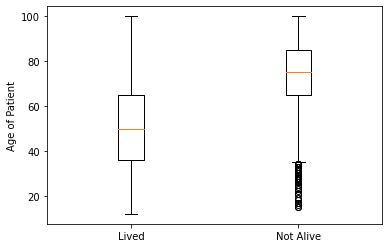

In [51]:
plt.boxplot([df_lived['AGE_YRS'].dropna(), df_died['AGE_YRS'].dropna()],labels = ['Lived','Not Alive'])
plt.ylabel('Age of Patient')
plt.show()

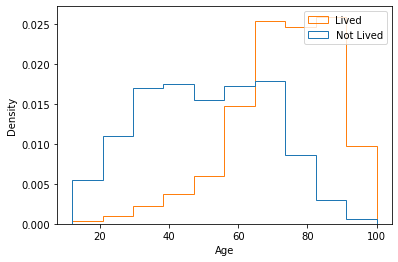

In [58]:
plt.hist([df_lived['AGE_YRS'].dropna(), df_died['AGE_YRS'].dropna()],histtype='step',density=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['Lived','Not Lived'])
plt.show()

In [54]:
stats.ttest_ind(df_died['AGE_YRS'].dropna().sample(n=1000), df_lived['AGE_YRS'].dropna().sample(n=1000), equal_var = False)

Ttest_indResult(statistic=30.52115387222009, pvalue=3.6330367957379495e-167)